In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False)  # low dpi (dots per inch) yields small inline figures
results_file = '/scratch/users/jjzhu/tmp_data/intestine.h5ad'
sys.path.insert(0,'/home/users/jjzhu/source_code/aloe/src')
sys.path.insert(0,'./src')

/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


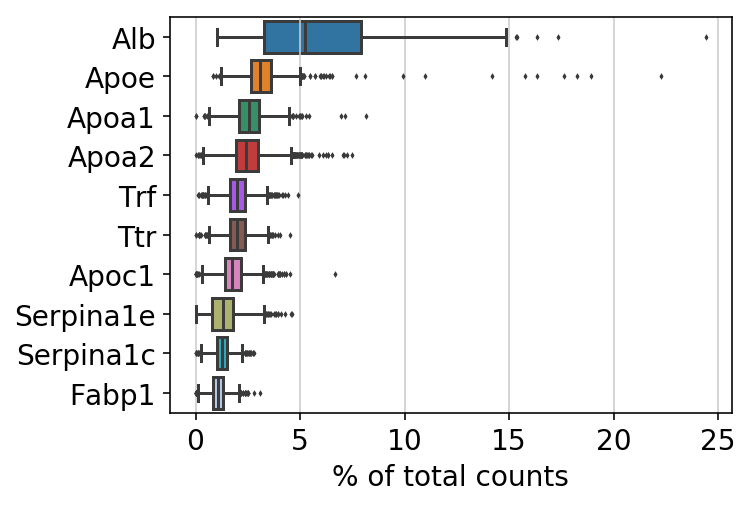

filtered out 16998 genes that are detectedin less than 10 cells


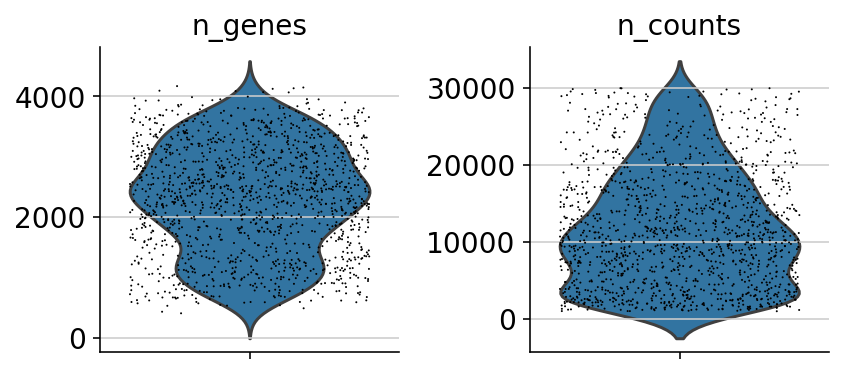

Filtered out: 16998 genes; remaining 10299
Filtered out: 0 doublet cells
View of AnnData object with n_obs × n_vars = 1415 × 10299 
    obs: 'n_genes', 'n_counts'
    var: 'gene_ids', 'n_cells'
normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


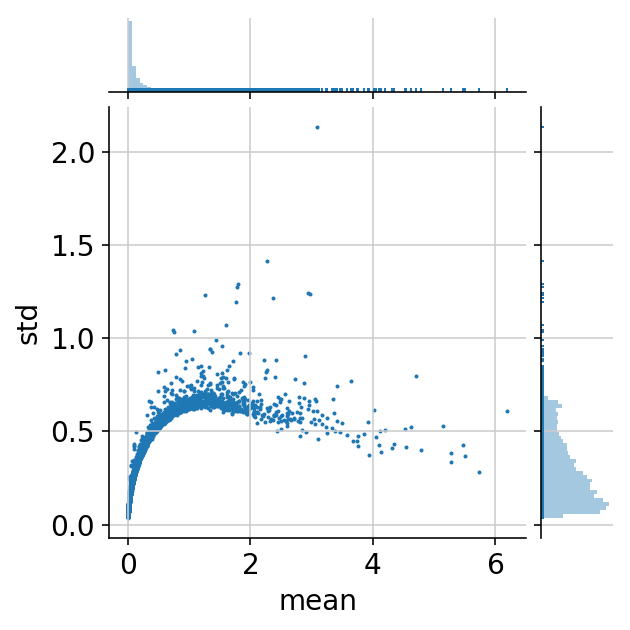

In [2]:
from liver_info import get_known_liver_markers, load_hepatocyte_data, load_zonation_result
from scrna_utils import transform_filter_anndata
from general_utils import norm_mtx

dat_dir = '/share/PI/sabatti/sc_data/liver2k'
adata = load_hepatocyte_data(dat_dir, verbose=True)
adata = transform_filter_anndata(adata, scale_pfx='original')

In [3]:
zone_vals = load_zonation_result(dat_dir, just_vals=True)
idx = [i for i, v in enumerate(zone_vals) if v ==1]
start_cell = adata.obs.iloc[idx[0]].name

In [4]:
from shared_utils import run_paga_clustering, run_paga_pseudotime
adata = run_paga_pseudotime(adata, start_cell)

computing PCA with n_comps = 50
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:15)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9620138  0.9496291  0.9347685  0.91979057 0.9114763
     0.9040927  0.8955724  0.89186907 0.88873756 0.8703341  0.8621616
     0.8614877  0.8572669  0.84996355]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [5]:
adata.obs['zone'] = zone_vals

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:32)


/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


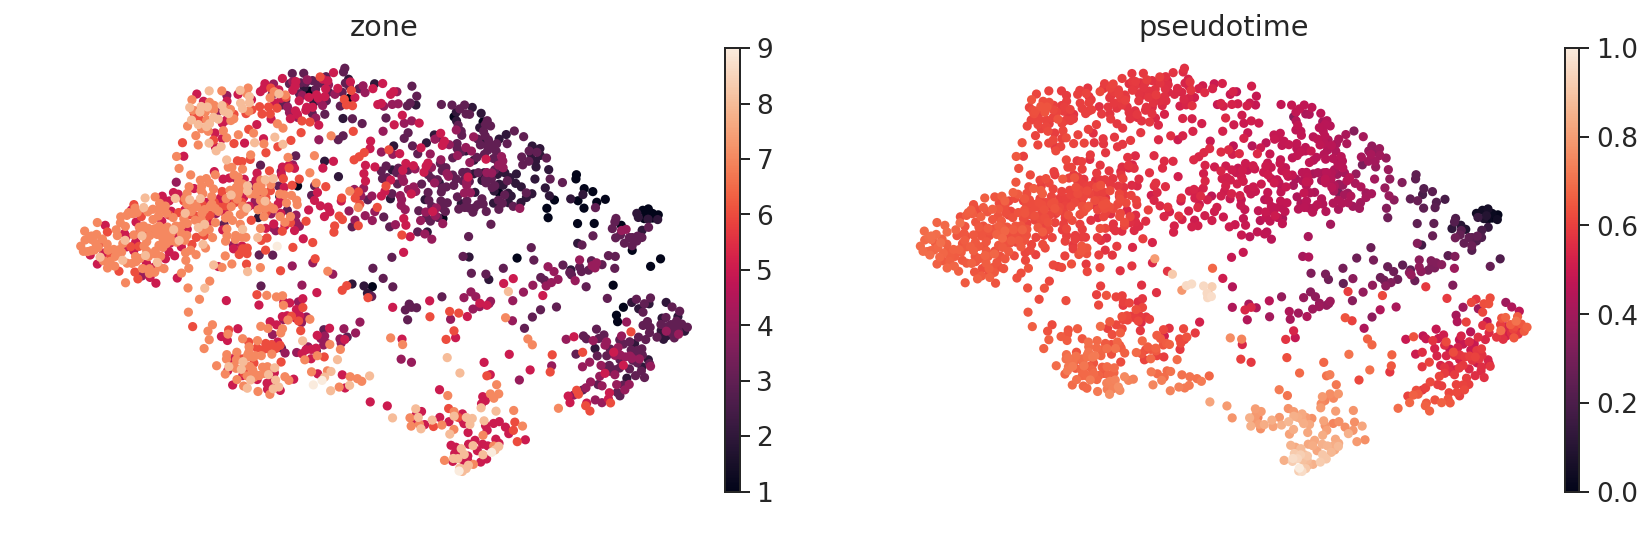

In [6]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color=['zone', 'pseudotime'], legend_loc='on data')

In [7]:
adata.obs[['zone', 'pseudotime']].corr('spearman')

,zone,pseudotime
zone,1.000000,0.673416
pseudotime,0.673416,1.000000


In [8]:
out_dir = '/share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/hepa_data'
fn = os.path.join(out_dir, 'ti_methods', 'paga_obs_df.csv')
adata.obs.to_csv(fn, index=False)
print('Saved to: {}'.format(fn))

Saved to: /share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/hepa_data/ti_methods/paga_obs_df.csv


In [9]:
adata.obs.head()

,n_genes,n_counts,cell_id,pseudotime,zone
Cell1,1779,6726.214844,Cell1,0.600050,3
Cell2,3387,20066.574219,Cell2,0.621813,7
Cell3,2791,16297.222656,Cell3,0.678568,7
Cell4,2377,13083.556641,Cell4,0.654502,7
Cell5,2931,18036.222656,Cell5,0.229735,4
